# Identify the Sentiments

given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.





# Importing all libraries required to process text

In [1]:
import pandas as pd
import nltk
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

In [4]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [5]:
data = pd.read_csv(r'F:\Kaggle\train.csv')
data

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


# Droping the Nan values from data

In [7]:
df = data.dropna()
df

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [8]:
y = df['label']

In [9]:
messages = df.copy()

# Text preprocessing

In [10]:
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()  

In [11]:
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus


['fingerprint pregnancy test http goo gl h mfqv android apps beautiful cute health igers iphoneonly iphonesia iphone',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias http instagram com p yget jc jm',
 'love would go talk makememories unplug relax iphone smartphone wifi connect http fb n lsupcu',
 'wired know george made way iphone cute daventry home http instagr p li ujs k',
 'amazing service apple even talk question unless pay stupid support',
 'iphone software update fucked phone big time stupid iphones',
 'happy u instapic instadaily u sony xperia xperiaz http instagram com p z qgfwlvj',
 'new type c charger cable uk http www ebay co uk itm bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc',
 'bout go shopping listening music iphone justme music likeforlike followforfollow http instagr p vj bg tlql',
 'photo fun selfie pool water sony camera pic

In [13]:
voc_size = 5000

In [59]:
onehot_rep = [one_hot(words, voc_size)for words in corpus]
#onehot_rep

In [15]:
sent_len = 20
embedded_docs = pad_sequences(onehot_rep, padding = 'pre', maxlen = sent_len)
print(embedded_docs)

[[   0    0    0 ... 2619 2845  382]
 [   0    0    0 ...  233  584 3461]
 [   0    0    0 ... 2506 3496 4016]
 ...
 [   0    0    0 ... 1396 4322 4997]
 [   0    0 1519 ... 4246 2851 3669]
 [   0    0    0 ...  409 3738 4266]]


In [16]:
len(embedded_docs)

7920

# Creating LSTM Neural Network

In [17]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_len))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
X_final = np.array(embedded_docs)
Y_final = np.array(y)
print(X_final.shape)
print(Y_final.shape)

(7920, 20)
(7920,)


# Splitting data into train, test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.33, random_state = 42)

In [20]:
model.fit(X_train,y_train,  validation_data = (X_test, y_test), epochs = 50, batch_size = 64)

Train on 5306 samples, validate on 2614 samples
Epoch 1/50
5306/5306 [==============================] - 8s 2ms/sample - loss: 0.3876 - accuracy: 0.8302 - val_loss: 0.2824 - val_accuracy: 0.8780
Epoch 2/50
5306/5306 [==============================] - 3s 531us/sample - loss: 0.2277 - accuracy: 0.9024 - val_loss: 0.2770 - val_accuracy: 0.8826
Epoch 3/50
5306/5306 [==============================] - 2s 460us/sample - loss: 0.1585 - accuracy: 0.9393 - val_loss: 0.2988 - val_accuracy: 0.8791
Epoch 4/50
5306/5306 [==============================] - 2s 454us/sample - loss: 0.1157 - accuracy: 0.9591 - val_loss: 0.3679 - val_accuracy: 0.8722
Epoch 5/50
5306/5306 [==============================] - 2s 396us/sample - loss: 0.0838 - accuracy: 0.9729 - val_loss: 0.5452 - val_accuracy: 0.8650
Epoch 6/50
5306/5306 [==============================] - 2s 446us/sample - loss: 0.0647 - accuracy: 0.9800 - val_loss: 0.5421 - val_accuracy: 0.8531
Epoch 7/50
5306/5306 [==============================] - 2s 466us/s

In [21]:
y_pred = model.predict_classes(X_test)


In [33]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[1694,  212],
       [ 249,  459]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8236419280795715

# as seen previous LSTM model is overfitted so we added Dropout layer with Dropout rate of 0.2

In [29]:
from tensorflow.keras.layers import Dropout
embedding_vector_features = 40
model1 = Sequential()
model1.add(Embedding(voc_size, embedding_vector_features, input_length = sent_len))
model1.add(LSTM(200))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               192800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("LSTM_early.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50,
                                                  restore_best_weights=True)

In [31]:

model1.fit(X_train,y_train,  validation_data = (X_test, y_test), epochs = 100, batch_size = 64,callbacks=[checkpoint_cb, early_stopping_cb])

Train on 5306 samples, validate on 2614 samples
Epoch 1/100
5306/5306 [==============================] - 7s 1ms/sample - loss: 0.3819 - accuracy: 0.8321 - val_loss: 0.2845 - val_accuracy: 0.8738
Epoch 2/100
5306/5306 [==============================] - 4s 696us/sample - loss: 0.2200 - accuracy: 0.9084 - val_loss: 0.2957 - val_accuracy: 0.8822
Epoch 3/100
5306/5306 [==============================] - 4s 720us/sample - loss: 0.1528 - accuracy: 0.9389 - val_loss: 0.3428 - val_accuracy: 0.8718
Epoch 4/100
5306/5306 [==============================] - 4s 708us/sample - loss: 0.1107 - accuracy: 0.9576 - val_loss: 0.6836 - val_accuracy: 0.8573
Epoch 5/100
5306/5306 [==============================] - 4s 697us/sample - loss: 0.0833 - accuracy: 0.9717 - val_loss: 0.6217 - val_accuracy: 0.8638
Epoch 6/100
5306/5306 [==============================] - 4s 699us/sample - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.5281 - val_accuracy: 0.8542
Epoch 7/100
5306/5306 [==============================] - 4s 

In [34]:
y_pred1 = model1.predict_classes(X_test)
confusion_matrix(y_test, y_pred1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)


0.8737566947207345

In [35]:
from tensorflow import keras
model_test = keras.models.load_model("LSTM_early.h5")
#mse_test = model_test.evaluate(X_test, y_test)
pre = model_test.predict_classes(X_test)

In [36]:
from sklearn import metrics
y_pred_prob = model_test.predict_proba(X_test)
y_pred_prob

array([[0.01175848],
       [0.6190456 ],
       [0.0136128 ],
       ...,
       [0.5502401 ],
       [0.4255453 ],
       [0.09180172]], dtype=float32)

In [41]:
print(confusion_matrix(y_test, pre))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

[[1700  206]
 [ 124  584]]


0.8737566947207345

In [45]:
print("AUC Score: " + '{:.5f}%'.format(metrics.roc_auc_score(y_test, pre)*100))

AUC Score: 85.83895%


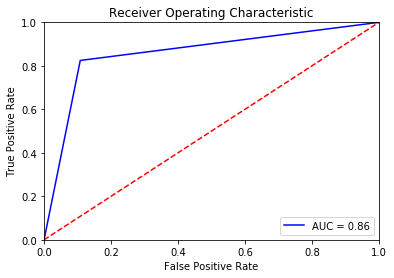

In [38]:
import matplotlib.pyplot as plt
preds = y_pred_prob
fpr, tpr, threshold = metrics.roc_curve(y_test, pre)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# importing test data and sample data 

In [57]:
test = pd.read_csv(r'F:\Kaggle\test.csv')
sample = pd.read_csv(r'F:\Kaggle\sample_submission.csv')

In [46]:
df_test = test.dropna()
df_test

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


In [47]:
messages_test = df_test.copy()

In [48]:
corpus_test = []
for i in range(len(messages_test)):
    review = re.sub('[^a-zA-Z]', ' ', messages_test['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_test.append(review)

In [58]:
onehot_rep_test = [one_hot(words, voc_size)for words in corpus_test]
#onehot_rep_test

In [50]:
sent_len = 20
embedded_docs_test = pad_sequences(onehot_rep_test, padding = 'pre', maxlen = sent_len)
print(embedded_docs_test)

[[   0    0    0 ... 3782  404 2322]
 [   0    0    0 ... 3738  629 2357]
 [   0    0    0 ...  257 1085 1385]
 ...
 [   0    0    0 ... 1213  404  382]
 [   0    0    0 ... 3910  994  404]
 [   0    0    0 ... 4171 3738 3579]]


In [51]:
pred1 = model_test.predict_classes(embedded_docs_test)

In [52]:
pred1

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [53]:
sample

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0
...,...,...
1948,9869,0
1949,9870,0
1950,9871,0
1951,9872,0


In [54]:
pred=pd.DataFrame(pred1)
datasets=pd.concat([sample['id'],pred],axis=1)
datasets.columns=['id', 'label']
datasets.to_csv('LSTM_sample.csv',index=False)

In [55]:
sam = pd.read_csv('LSTM_sample.csv')
sam

,id,label
0,7921,1
1,7922,0
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1


In [56]:
sam.isnull()

,id,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1948,False,False
1949,False,False
1950,False,False
1951,False,False
